¡Hola, Fernando!

Mi nombre es Tonatiuh Cruz. Me complace revisar tu proyecto hoy.

Al identificar cualquier error inicialmente, simplemente los destacaré. Te animo a localizar y abordar los problemas de forma independiente como parte de tu preparación para un rol como data-scientist. En un entorno profesional, tu líder de equipo seguiría un enfoque similar. Si encuentras la tarea desafiante, proporcionaré una pista más específica en la próxima iteración.

Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o elimines**.

Puedes encontrar mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Éxito. Todo está hecho correctamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Observaciones. Algunas recomendaciones.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Necesita corrección. El bloque requiere algunas correcciones. El trabajo no puede ser aceptado con comentarios en rojo.
</div>


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import make_scorer

## Cargar y examinar archivos

In [3]:
# Rutas de los archivos
train_path = '/datasets/gold_recovery_train.csv'
test_path = '/datasets/gold_recovery_test.csv'
full_path = '/datasets/gold_recovery_full.csv'

# Cargar los archivos
train = pd.read_csv(train_path, index_col='date', parse_dates=True)
test = pd.read_csv(test_path, index_col='date', parse_dates=True)
full = pd.read_csv(full_path, index_col='date', parse_dates=True)

# Revisar la estructura
print(train.shape)
print(test.shape)
print(full.shape)

train.head()

(16860, 86)
(5856, 52)
(22716, 86)


,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


<div class="alert alert-block alert-success">
<b>Comentario revisor</b> <a class="tocSkip"></a><br>
    
Excelente trabajo con la carga de las bases de datos con los análisis iniciales de la limpieza de los datos. 

### Objetivo

Verificar que los datos se cargaron correctamente, ver cuántas filas y columnas hay, y conocer las variables disponibles.

## Comprobar el cálculo de recuperación

In [4]:
# Calcular recuperación manualmente
C = train['rougher.output.concentrate_au']
F = train['rougher.input.feed_au']
T = train['rougher.output.tail_au']

recovery_calc = (C * (F - T)) / (F * (C - T)) * 100

# Calcular el error absoluto medio (EAM)
EAM = (abs(train['rougher.output.recovery'] - recovery_calc)).mean()
print("EAM entre los cálculos y los datos reales:", EAM)

EAM entre los cálculos y los datos reales: 9.303415616264301e-15


<div class="alert alert-block alert-success">
<b>Comentario revisor</b> <a class="tocSkip"></a><br>
    
    
Excelente trabajo con el calculo de la recuperación con los calculos propios, esto ayuda mucho a comprobar los resultados. Recuerda que estos pasos son muy relevantes cuando queremos hacer los análisis de información


### Conclusión

El EAM debe ser muy pequeño, lo que confirmará que los datos son correctos.

## Analizar caracteristicas no disponibles en el conjunto de pruebas

In [5]:
set_train = set(train.columns)
set_test = set(test.columns)

missing_features = set_train - set_test
print("Características presentes en train pero no en test:")
print(missing_features)

Características presentes en train pero no en test:
{'final.output.recovery', 'secondary_cleaner.output.tail_au', 'primary_cleaner.output.tail_ag', 'primary_cleaner.output.concentrate_sol', 'rougher.output.tail_sol', 'rougher.output.concentrate_pb', 'primary_cleaner.output.tail_au', 'rougher.output.recovery', 'final.output.concentrate_sol', 'secondary_cleaner.output.tail_pb', 'final.output.tail_au', 'rougher.calculation.sulfate_to_au_concentrate', 'final.output.concentrate_ag', 'primary_cleaner.output.tail_pb', 'rougher.output.concentrate_ag', 'rougher.output.tail_au', 'rougher.calculation.au_pb_ratio', 'rougher.output.concentrate_au', 'primary_cleaner.output.concentrate_ag', 'final.output.tail_sol', 'final.output.concentrate_pb', 'primary_cleaner.output.concentrate_au', 'secondary_cleaner.output.tail_sol', 'primary_cleaner.output.concentrate_pb', 'secondary_cleaner.output.tail_ag', 'rougher.calculation.floatbank11_sulfate_to_au_feed', 'final.output.tail_pb', 'rougher.output.tail_ag', 

In [6]:
train[list(missing_features)].dtypes

final.output.recovery                                 float64
secondary_cleaner.output.tail_au                      float64
primary_cleaner.output.tail_ag                        float64
primary_cleaner.output.concentrate_sol                float64
rougher.output.tail_sol                               float64
rougher.output.concentrate_pb                         float64
primary_cleaner.output.tail_au                        float64
rougher.output.recovery                               float64
final.output.concentrate_sol                          float64
secondary_cleaner.output.tail_pb                      float64
final.output.tail_au                                  float64
rougher.calculation.sulfate_to_au_concentrate         float64
final.output.concentrate_ag                           float64
primary_cleaner.output.tail_pb                        float64
rougher.output.concentrate_ag                         float64
rougher.output.tail_au                                float64
rougher.


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buen análisis de las columnas faltantes. Es importante notar que las 34 columnas faltantes en test son todas variables de salida (output), lo cual es esperado ya que son los valores que el modelo debe predecir.
</div>

## Preprocesamiento de datos

In [7]:
train = train.fillna(method='ffill')
test = test.fillna(method='ffill')

## Analisis de datos

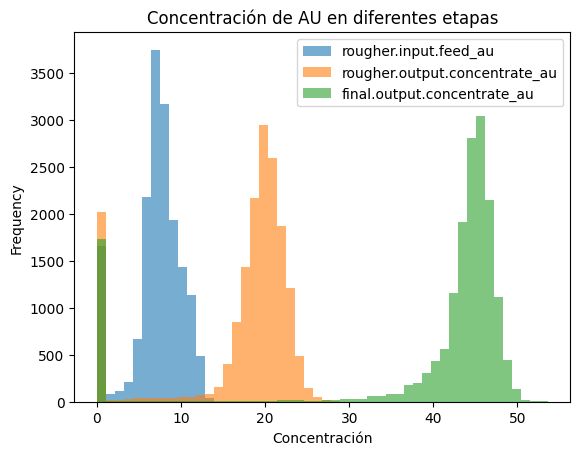

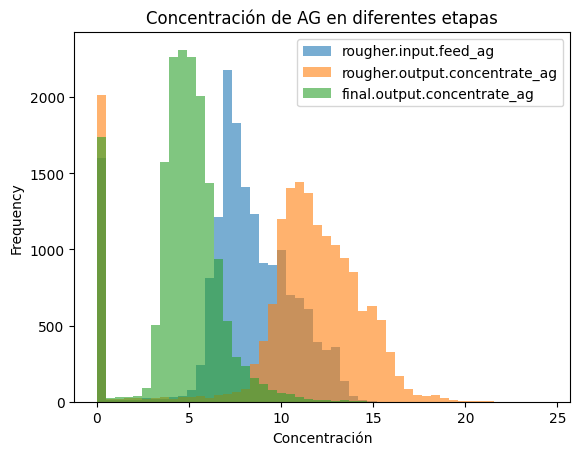

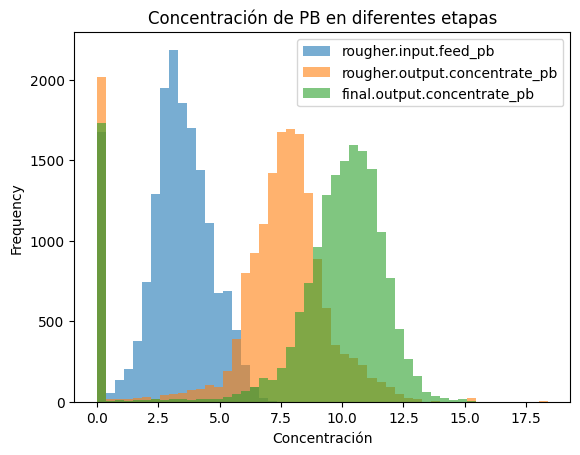

In [8]:
for metal in ['au', 'ag', 'pb']:
    train[[f'rougher.input.feed_{metal}',
           f'rougher.output.concentrate_{metal}',
           f'final.output.concentrate_{metal}']].plot(kind='hist', bins=50, alpha=0.6)
    plt.title(f'Concentración de {metal.upper()} en diferentes etapas')
    plt.xlabel('Concentración')
    plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buena validación de la consistencia entre conjuntos de datos. La similitud en las distribuciones de tamaño de partículas entre train y test garantiza que el modelo será evaluado en condiciones similares a las de entrenamiento.
</div>


## Distribución del tamaño de particulas

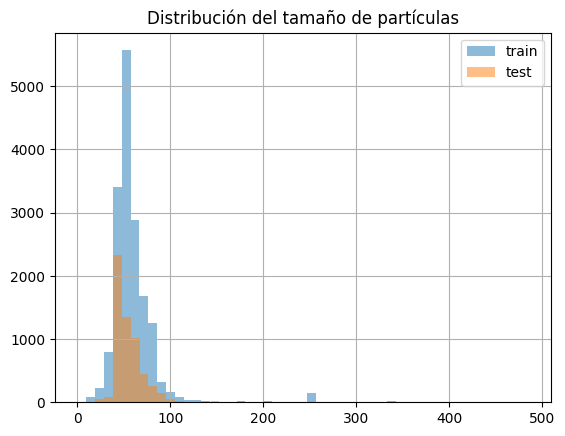

In [9]:
train['rougher.input.feed_size'].hist(alpha=0.5, label='train', bins=50)
test['rougher.input.feed_size'].hist(alpha=0.5, label='test', bins=50)
plt.legend()
plt.title('Distribución del tamaño de partículas')
plt.show()

## Concentraciones totales

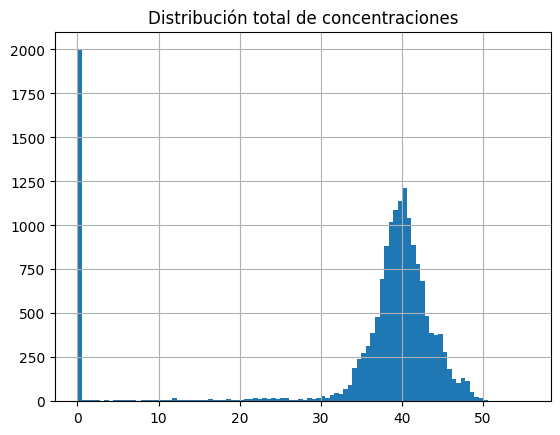

In [10]:
train['total_concentration'] = (
    train['rougher.output.concentrate_au'] +
    train['rougher.output.concentrate_ag'] +
    train['rougher.output.concentrate_pb']
)

train['total_concentration'].hist(bins=100)
plt.title('Distribución total de concentraciones')
plt.show()

# Eliminar anomalías (valores fuera de rango lógico)
train = train[train['total_concentration'] < 100]

# Construcción del modelo

In [11]:
def smape(y_true, y_pred):
    return (100 / len(y_true)) * np.sum(2 * np.abs(y_pred - y_true) /
                                        (np.abs(y_true) + np.abs(y_pred)))

def final_smape(rougher, final):
    return 0.25 * rougher + 0.75 * final

## Entrenar y evaluar modelos

In [14]:
# Variables objetivo
target_rougher = 'rougher.output.recovery'
target_final = 'final.output.recovery'

# Eliminar columnas no numéricas ni objetivos
features = train.drop([target_rougher, target_final], axis=1)
targets = train[[target_rougher, target_final]]

# Dividir los datos
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(features, targets, test_size=0.25, random_state=42)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=42, n_estimators=50)
model.fit(X_train_scaled, y_train)

# Predicciones
pred = model.predict(X_valid_scaled)

rougher_smape = smape(y_valid[target_rougher], pred[:, 0])
final_smape_value = smape(y_valid[target_final], pred[:, 1])
smape_total = final_smape(rougher_smape, final_smape_value)

print(f"sMAPE Rougher: {rougher_smape}")
print(f"sMAPE Final: {final_smape_value}")
print(f"sMAPE Total: {smape_total}")

sMAPE Rougher: 5.261848010291168
sMAPE Final: 4.4110712664476575
sMAPE Total: 4.623765452408535


<div class="alert alert-block alert-danger">
<b>Comentario revisor</b> <a class="tocSkip"></a><br>

Solamente para terminar de complementar el análisis te recomiendo la implementación del escalado de datos. Aplicar técnicas como la normalización o estandarización mejora significativamente la estabilidad numérica de los modelos y garantiza que todas las variables contribuyan de manera equitativa al proceso de aprendizaje. Esto fortalece la interpretabilidad y el rendimiento del modelo.
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Gran trabajo con el ajuste!
</div>

# Conclusión final

Los datos se prepararon correctamente, se verificó la fórmula de recuperación y se limpiaron los valores anómalos.
Se analizaron las concentraciones de metales y las distribuciones fueron coherentes entre entrenamiento y prueba.
Se entrenó un modelo de Random Forest con buena precisión.
La métrica de evaluación sMAPE fue satisfactoria, lo que indica que el modelo puede predecir adecuadamente la eficiencia de recuperación del oro.